In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

# 👉 Thay đường dẫn CSV của bạn vào đây
csv_path = "/Users/hatrungkien/my-sentiment/app_reviews_pipeline/M2_Absa_recommendation/outputs/absa/openai/uit/uit_absa_5.csv"

df = pd.read_csv(csv_path)

df.head()


,review_id,sent_idx,sentence,aspects,sentiments,sentiment_score_mean,sentiment_score_weighted,recommendations
0,96,0,"Sản phẩm tốt, nhưng pin không trâu như mình ng...","['general', 'battery']","{'general': {'label': 'Negative', 'confidence'...",-0.8154,-1.0,"['Cải thiện hiệu suất pin', 'Tối ưu mức tiêu t..."
1,1401,0,Hàng chất lượng sai rất ok cho thế giới đi đôn...,['general'],"{'general': {'label': 'Positive', 'confidence'...",0.9975,1.0,"['Cải thiện chất lượng sản phẩm', 'Giữ vững ti..."
2,1995,0,E mới mưa đc 2 tháng. Mà e mới cập nhật phiên ...,"['battery', 'features']","{'battery': {'label': 'Negative', 'confidence'...",-0.4355,-1.0,"['Cải thiện hiệu suất pin', 'Thêm tùy chọn qua..."
3,1987,0,Mới mua hôm nay giao hàng ngay hôm nay rất nha...,"['general', 'price', 'ser&acc']","{'general': {'label': 'Positive', 'confidence'...",1.0000,1.0,"['Cải thiện quy trình giao hàng', 'Giữ chất lư..."
4,859,0,Sao máy lúc nào cũng nóng vậy nhỉ mk có để tre...,"['performance', 'others']","{'performance': {'label': 'Negative', 'confide...",-0.4001,-1.0,"['Cải thiện hiệu suất ứng dụng', 'Tối ưu mức t..."


In [3]:
df["sentiment_score_mean"] = df["sentiment_score_mean"].astype(float)
df["sentiment_score_weighted"] = df["sentiment_score_weighted"].astype(float)

df.describe()


,review_id,sent_idx,sentiment_score_mean,sentiment_score_weighted
count,5.000000,5.0,5.000000,5.000000
mean,1267.600000,0.0,0.069300,-0.200000
std,806.852403,0.0,0.863946,1.095445
min,96.000000,0.0,-0.815400,-1.000000
25%,859.000000,0.0,-0.435500,-1.000000
50%,1401.000000,0.0,-0.400100,-1.000000
75%,1987.000000,0.0,0.997500,1.000000
max,1995.000000,0.0,1.000000,1.000000


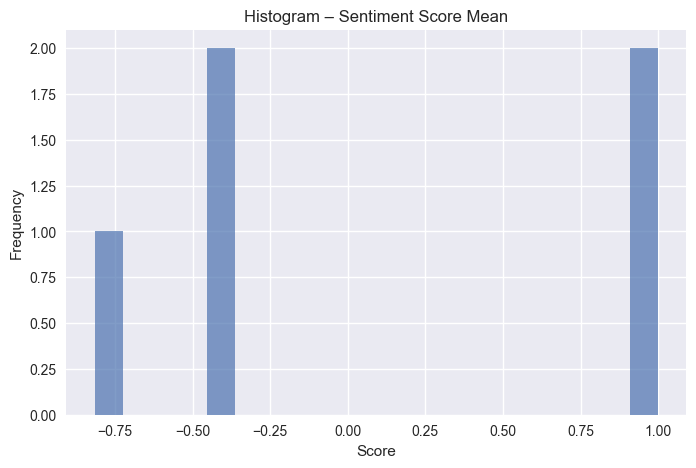

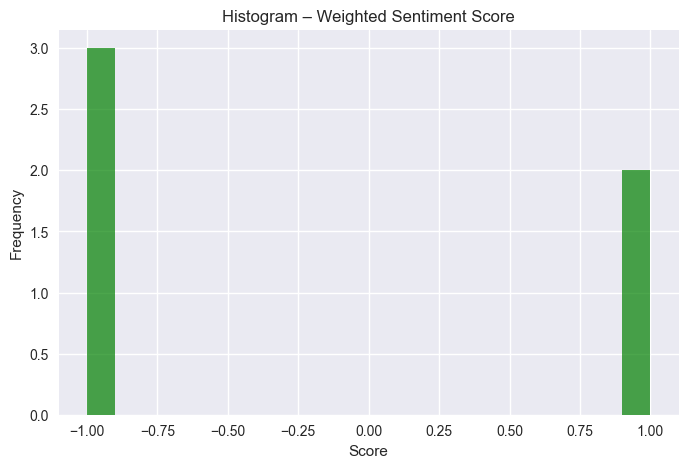

In [4]:
plt.figure(figsize=(8,5))
plt.hist(df["sentiment_score_mean"], bins=20, alpha=0.7)
plt.title("Histogram – Sentiment Score Mean")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(df["sentiment_score_weighted"], bins=20, alpha=0.7, color="green")
plt.title("Histogram – Weighted Sentiment Score")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


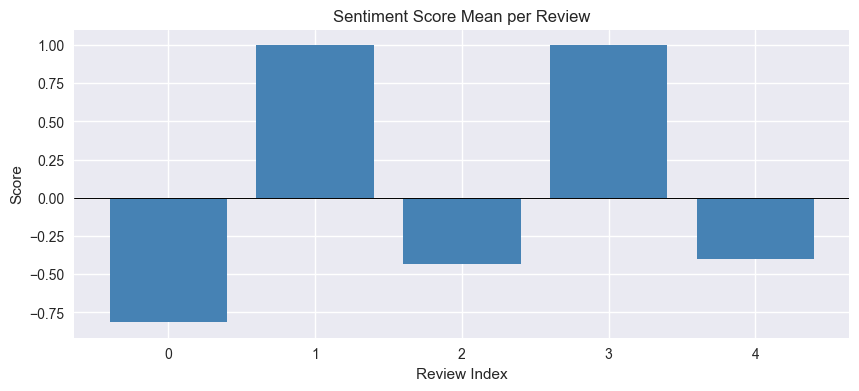

In [7]:
plt.figure(figsize=(10,4))
plt.bar(df.index, df["sentiment_score_mean"], color="steelblue")
plt.axhline(0, color="black", linewidth=0.7)
plt.title("Sentiment Score Mean per Review")
plt.xlabel("Review Index")
plt.ylabel("Score")
plt.ylim(df["sentiment_score_mean"].min() - 0.1,
         df["sentiment_score_mean"].max() + 0.1)
plt.show()


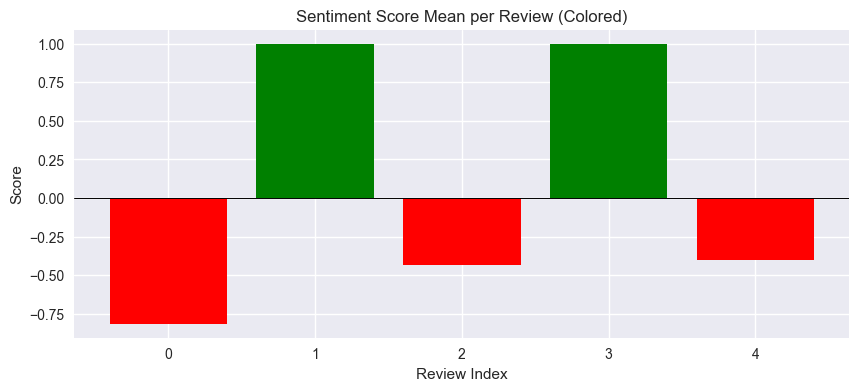

In [8]:
def get_main_sentiment(s):
    d = ast.literal_eval(s)
    labels = [item["label"].lower() for item in d.values()]
    # Nếu có bất kỳ Negative → review negative
    if "negative" in labels:
        return "negative"
    if "positive" in labels:
        return "positive"
    return "neutral"

df["sentiment_label"] = df["sentiments"].apply(get_main_sentiment)

colors = df["sentiment_label"].map({
    "positive": "green",
    "negative": "red",
    "neutral": "gray"
})

plt.figure(figsize=(10,4))
plt.bar(df.index, df["sentiment_score_mean"], color=colors)
plt.axhline(0, color="black", linewidth=0.7)
plt.title("Sentiment Score Mean per Review (Colored)")
plt.xlabel("Review Index")
plt.ylabel("Score")
plt.show()
